# Model evaluation

This notebook contains various model evaluation techniques, including:
- __Confusion matrix__
- __Classification report__
- __Cross-validation statistics__
- __Feature importance (impurity-based/permuation-based)__


### Confusion matrix

In [1]:
import ipywidgets as widgets

with open('reports/confusion_matrix.png', 'rb') as f:
    image = f.read()
    
widgets.Image(value=image, format='png')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc…

### Classification report

In [2]:
import pandas as pd

df = pd.read_csv('reports/classification_report.csv')
df

,Unnamed: 0,precision,recall,f1-score,support
0,Absence,0.848485,0.848485,0.848485,33.000000
1,Presence,0.821429,0.821429,0.821429,28.000000
2,accuracy,0.836066,0.836066,0.836066,0.836066
3,macro avg,0.834957,0.834957,0.834957,61.000000
4,weighted avg,0.836066,0.836066,0.836066,61.000000


### Hyperparameter tuning ranks

In [3]:
df = pd.read_csv('reports/cv_results.csv')
df = df.sort_values('rank_test_score')
columns = [i.removeprefix('param_') for i in df.columns if 'param_' in i]    
columns.append('rank')
df = pd.DataFrame(df, columns=[i for i in df.columns if 'param_' in i or 'rank' in i])
df.columns = columns
df

,n_estimators,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,rank
5,10,10,10,10.0,sqrt,NaN,1
7,200,10,5,100.0,NaN,100.0,2
3,100,10,2,20.0,log2,20.0,3
8,50,10,10,20.0,log2,NaN,4
2,200,20,1,20.0,sqrt,10.0,5
6,10,10,1,10.0,log2,20.0,6
0,50,5,5,50.0,sqrt,50.0,7
1,100,5,10,50.0,NaN,NaN,8
4,500,20,2,NaN,NaN,10.0,9
9,100,2,1,100.0,NaN,NaN,10


### Full hyperparameter tuning report

In [4]:
df = pd.read_csv('reports/cv_results.csv')
df = df.sort_values('rank_test_score')
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,5,0.022076,0.004798,0.019609,0.001836,10,10,10,10.0,sqrt,NaN,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.834201,0.816327,0.790564,0.729521,0.853847,0.804892,0.043064,1
7,7,0.329578,0.073730,0.021073,0.003324,200,10,5,100.0,NaN,100.0,"{'n_estimators': 200, 'min_samples_split': 10,...",0.790011,0.816327,0.832451,0.770331,0.812745,0.804373,0.021756,2
3,3,0.124761,0.024680,0.039778,0.020888,100,10,2,20.0,log2,20.0,"{'n_estimators': 100, 'min_samples_split': 10,...",0.814440,0.795578,0.832451,0.729521,0.790564,0.792511,0.034805,3
8,8,0.088153,0.029114,0.023196,0.006497,50,10,10,20.0,log2,NaN,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.773205,0.836463,0.791667,0.728572,0.830952,0.792172,0.039675,4
2,2,0.270854,0.033923,0.032331,0.023684,200,20,1,20.0,sqrt,10.0,"{'n_estimators': 200, 'min_samples_split': 20,...",0.812335,0.794383,0.832451,0.706790,0.810754,0.791343,0.043968,5
6,6,0.020846,0.002101,0.018392,0.001597,10,10,1,10.0,log2,20.0,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.770632,0.795578,0.854357,0.708333,0.768699,0.779520,0.047164,6
0,0,0.085746,0.009398,0.026331,0.010423,50,5,5,50.0,sqrt,50.0,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.812335,0.753259,0.812745,0.708333,0.791667,0.775668,0.040028,7
1,1,0.134992,0.010410,0.023466,0.003842,100,5,10,50.0,NaN,NaN,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.748013,0.712136,0.853847,0.728572,0.812089,0.770931,0.053564,8
4,4,0.776872,0.068820,0.031683,0.004569,500,20,2,NaN,NaN,10.0,"{'n_estimators': 500, 'min_samples_split': 20,...",0.790011,0.709476,0.788690,0.750000,0.812089,0.770053,0.036289,9
9,9,0.126501,0.011191,0.016274,0.002396,100,2,1,100.0,NaN,NaN,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.748013,0.753259,0.810754,0.684590,0.771133,0.753550,0.040909,10


In [5]:
import pickle

with open('reports/model.pkl', 'rb') as f:
    clf = pickle.load(f)
    
with open('reports/test_data.pkl', 'rb') as f:
    X_test = pickle.load(f)
    y_test = pickle.load(f)
    
with open('reports/feature_data.pkl', 'rb') as f:
    fn = pickle.load(f)
    cn = pickle.load(f)
    dl = pickle.load(f)

### Impurity-based feature importance

Text(0, 0.5, 'Feature')

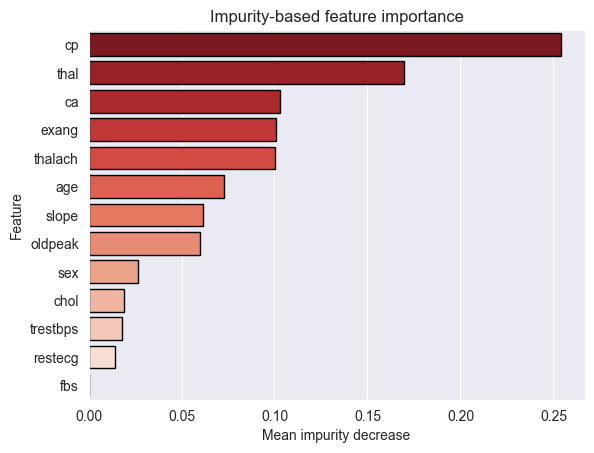

In [6]:
import seaborn as sns

feature_importance = pd.Series(clf.feature_importances_, index=fn)
feature_importance = feature_importance.sort_values(ascending=False)
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
sns.set_context(font_scale=1.2)
plot = sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette='Reds_r', color='red')
plot.set_title('Impurity-based feature importance')
plot.set_xlabel('Mean impurity decrease')
plot.set_ylabel('Feature')

### Permutation-based feature importance

Text(0, 0.5, 'Feature')

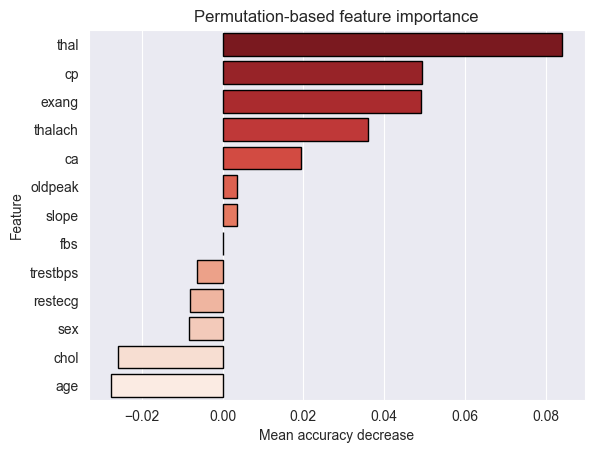

In [7]:
from sklearn.inspection import permutation_importance
pi = permutation_importance(clf, X_test, y_test, n_repeats=10, scoring='f1_weighted')
feature_importance = pd.Series(pi.importances_mean, index=fn)
feature_importance = feature_importance.sort_values(ascending=False)
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
sns.set_context(font_scale=1.2)
plot = sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette='Reds_r')
plot.set_title('Permutation-based feature importance')
plot.set_xlabel('Mean accuracy decrease')
plot.set_ylabel('Feature')